In [46]:
cd /Users/vallevaro/Desktop/GaiaLab/packages/scan

/Users/vallevaro/Desktop/GaiaLab/packages/scan


In [47]:
import scan_moving_sky

# Scanner: Theory

Model of a simple stalletie that scans the sky. The satellite is defined as a plane in space. This means that for any star contained in that plane or within a tolerance-angle of the plane, the star be detected and stored as measurements.

The Satellite's plane is uniquely defined by a point and a vector. Their are in the $\textbf{Baryentric Celestial Reference Frame (BCRS)}$ whose spatial axes are aligned with the International Celestial Reference System. This means that the satellite's zaxis is the normal vector to the satellite-plane with respect to BCRS.

The observations made by the scanner will be in the $\textbf{Scanning Reference System (SRS)}$.

Before the scanning takes plance, it is necessary to create a collection of stars or 'fake sky'. For now, all stars will be at a constant distance from the satellite (i.e. no parallax defined) and so they will all lie in the unit sphere surface. Stars are defined acoording to the $\textbf{Horizontal Coordinate System (HCS)}$. This system uses the observer's local horizon as the fundamental plane. It is expressed in terms of azimuth and altitude angles.
<img src="HCS.png" style='width:10'>


For rotations and change of reference a simple approach is by the using quaternions. For completeness, we include here the quaternion definition: 

$$
\begin{equation*}
\vec{q} =  \big\{ \cos(\frac{\beta}{2}), \vec{u}_{x}\sin(\frac{\beta}{2}),\vec{u}_{y}\sin(\frac{\beta}{2}), \vec{u}_{z}\sin(\frac{\beta}{2}) \big\}
\end{equation*}
$$
Where $\beta$ is the angle of rotation around the $\vec{u}$ axis. 

The satellite's attitude is described by a quaternion $\it{q}$. Using the satellite attitude, the transformation between the coordinates of an arbitrary vector $\it{v}$ from  $\it{BCRS}$ to $\it{SRS}$ is defined by: 
$$
\begin{equation}
\big\{\textbf{S}'\it{v},0 \big\} = \text{q}^{-1}\big\{\textbf{C}'\it{v}, 0\big\}\text{q}.
\end{equation}
$$

Therefore when SRS is not alinged with BCRS the measured angles to a star will differ. 
The  angles following the HCS are denoted as:

* From the SRS: $(\phi, \zeta)$
* From the BCRS: $(\alpha, \delta)$

The cartesian vector correspondient to these angles is: 
\begin{equation*}
\big\{\textbf{S}'\it{v},0 \big\}  =  \begin{vmatrix}
\cos(\zeta)\cos(\phi) \\
\cos(\zeta)\sin(\phi)\\
\sin(\phi)
\end{vmatrix}
\end{equation*}

And the computed angles from the vectors:

\begin{equation*}
\phi  =  \arctan(v_{y},v_{x}) 
\end{equation*}

\begin{equation*}
\zeta =  \arctan(v_{z}, \sqrt{v^{2}_{x} + v^{2}_{y}}) 
\end{equation*}


# Code: Step by step 

A) Satellite class creates an object with several functions and attributes. To initizalise it, it is necessaty to input the intial position of the satellite in the sky:
* Normal vector $\vec{n}$ to the satellite plane.
* Origin point $\textbf{O}$ in $\\R^{3}$

This defines the satellite plane: $\Pi$. 

Satellite takes therefore as arguments the $\vec{n}$ components and the geometric object $\textbf{O}$.

In [6]:
gaia = Satellite(0,0,1, Point3D(0,0,0))

B) Create a sky, with n=100 elements. Sky is an object that creates n number of objects named 'Observation'. This means sky.elements contains n Observation objects. 
* sky.elements cointains n <__main__.Observation> instances. 
    * Observation.coor: $(\alpha, \delta)$ (in radians)
    * Observation.vector: cartesian vector of HCS Observation.coor, $\vec{v} = (x,y,z)$ in BCRS. 

In [7]:
gaia.attitude

Quaternion(1.0 + 0.0 i + 0.0 j + 0.0 k)

In [14]:
sky = Sky(100)

In [15]:
sky.elements[1].coor

array([2.22974818, 1.42723425])

In [16]:
sky.elements[1].vector 

array([-0.08759977,  0.11311563,  0.98971265])

C) Call satellite.Scan(sky) function to scan sky. Because no rotation has been applied to the satellite yet, the SRS and BCRS frames coincide. 
The satellite.Scan function has args to change the characteristics of the scan. 
* $\textbf{satellite.Scan(sky, zeta , phi, deltaphi)}$: 
    - Altitude angle, zeta ($\zeta$): the altitude width to scan,  with respect to the satellite plane: $\Pi$.
    - Azimuth angle, phi ($\phi$) :total amount of radians swept by the scanner, in a circle of constant radius around the satellite's centre $\textbf{O}$.
    - Delta Phi, $\Delta \phi$: step at which the scanning phi changes. 


In [17]:
gaia.Scan(sky,np.radians(5.), np.radians(360.), np.radians(1.))

Once the scanning has been done, the observations that were in the scan field of view are stored in satellite.observations as instances. Because the scanner plane is normal to the BCRS z axis, only the stars in the XY plane have been seen, which explains the zero component of the $\zeta$ angle. 

In [18]:
gaia.observations

In [20]:
gaia.observations[1].coor, gaia.observations[2].coor

(array([ 1.14257235e+00, -9.45911546e-17]),
 array([2.7993545e+00, 2.0836682e-17]))

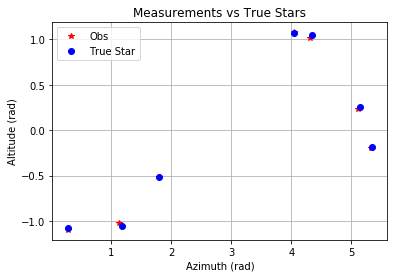

In [21]:
Plot(gaia, sky)

Before proceeding, need a quaternion that defines a rotation to apply to the satellite. 

In [8]:
qrot = Quaternion(1,2,3,-2)

In [9]:
gaia.zaxis, gaia.attitude

(array([0., 0., 1.]), Quaternion(1.0 + 0.0 i + 0.0 j + 0.0 k))

In [10]:
gaia.Rotate(qrot)

In [11]:
gaia.zaxis, gaia.attitude

(array([-0.77777778, -0.44444444, -0.44444444]),
 Quaternion(0.23570226039551587 + 0.47140452079103173 i + 0.7071067811865476 j + -0.47140452079103173 k))

In [13]:
gaia.Scan(sky)

NameError: name 'sky' is not defined

In [65]:
gaia.observations

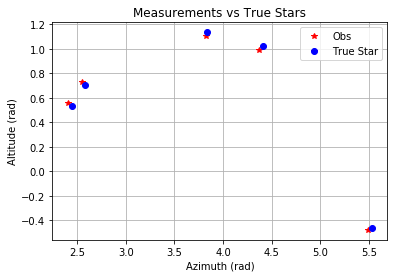

In [64]:
Plot(gaia, sky)

In [66]:
gaia.measurements